In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Read the excel file,skip some rows and get only the columns we need
df = pd.read_excel('Dataset.xlsx', sheet_name='Google Search_Data', skiprows=[0,1,2,3,4,5,6], usecols=[4,5])

##skip the rows which have no data
df = df.dropna()
df

,Week,Interest Score.1
0,Jan'21,44.0
1,Jan'21,57.0
2,Jan'21,44.0
3,Jan'21,42.0
4,Jan'21,52.0
...,...,...
134,Jul'23,62.0
135,Aug'23,64.0
136,Aug'23,68.0
137,Aug'23,66.0


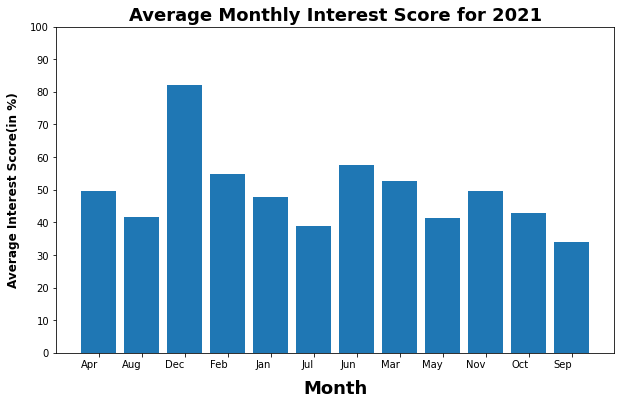

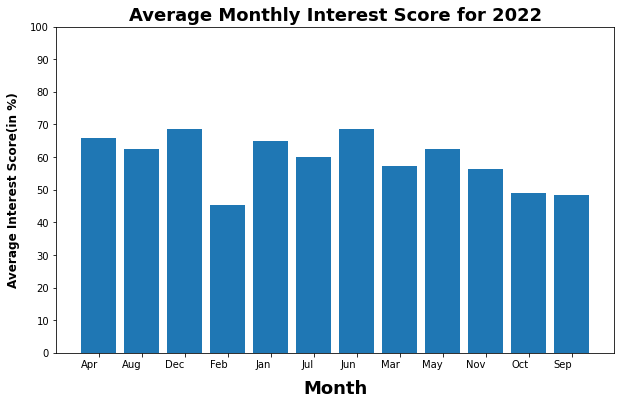

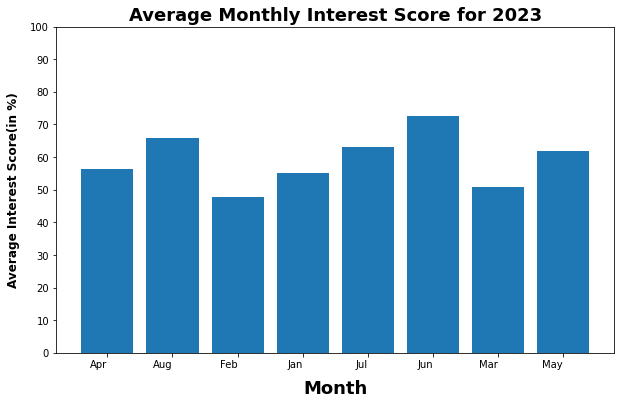

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and looks like the provided sample

# Convert 'Week' to datetime format
df['Week'] = pd.to_datetime(df['Week'], format="%b'%y")

# Extract year and month into separate columns
df['Year'] = df['Week'].dt.year
df['Month'] = df['Week'].dt.strftime('%b')  # Format to abbreviated month name

# Calculate the average interest score for each month
average_monthly_interest = df.groupby(['Year', 'Month'])['Interest Score.1'].mean().reset_index()

# Order the 'Month' column
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

average_monthly_interest['Month'] = pd.Categorical(average_monthly_interest['Month'], categories=month_order, ordered=True)

# Plotting separate graphs for each year
years = df['Year'].unique()

for year in years:
    year_data = average_monthly_interest[average_monthly_interest['Year'] == year]
    
    plt.figure(figsize=(10, 6))
    plt.bar(year_data['Month'], year_data['Interest Score.1'])
    plt.xlabel('Month', fontweight='bold', fontsize=18,labelpad=10)
    plt.ylabel('Average Interest Score(in %)', fontweight='bold', fontsize=12, labelpad=10)
    plt.title(f'Average Monthly Interest Score for {year}', fontweight='bold', fontsize=18)
    plt.xticks(rotation=0, ha='right')
    plt.ylim(0, 100)
    plt.yticks(range(0, 101, 10))
    plt.show()


C:\Users\Sahas Vivek\AppData\Local\Temp\ipykernel_22828\2077646666.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cumulative_average = average_monthly_interest.groupby('Month')['Interest Score.1'].sum() / len(df['Year'].unique())


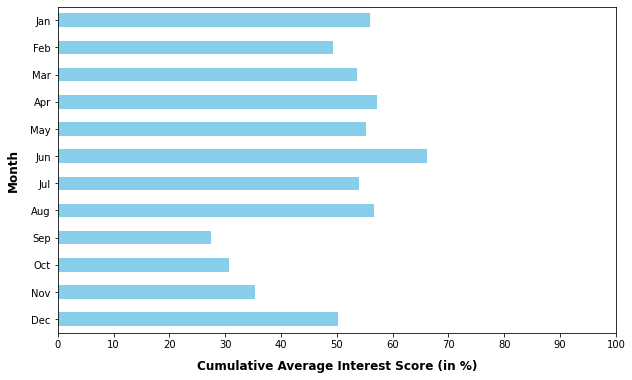

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded and looks like the provided sample

# Convert 'Week' to datetime format
df['Week'] = pd.to_datetime(df['Week'], format="%b'%y")

# Extract year and month into separate columns
df['Year'] = df['Week'].dt.year
df['Month'] = df['Week'].dt.strftime('%b')  # Format to abbreviated month name

# Calculate the average interest score for each month
average_monthly_interest = df.groupby(['Year', 'Month'])['Interest Score.1'].mean().reset_index()

# Order the 'Month' column
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

average_monthly_interest['Month'] = pd.Categorical(average_monthly_interest['Month'], categories=month_order, ordered=True)

# Sort the DataFrame based on the order of months
average_monthly_interest = average_monthly_interest.sort_values(['Year', 'Month'])

# Calculate cumulative average interest score for each month
cumulative_average = average_monthly_interest.groupby('Month')['Interest Score.1'].sum() / len(df['Year'].unique())

# Plotting a horizontal bar graph for cumulative average interest score
plt.figure(figsize=(10, 6))
cumulative_average.sort_index(ascending=False).plot(kind='barh', color='skyblue')
plt.xlabel('Cumulative Average Interest Score (in %)', fontweight='bold', fontsize=12, labelpad=10)
plt.ylabel('Month', fontweight='bold', fontsize=12, labelpad=10)
plt.title('Cumulative Average Interest Score by Month(Fig.1)', fontweight='bold', fontsize=14)
plt.xticks(range(0, 101, 10))
plt.show()
